In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import igraph
import seaborn
###
from scEasyMode import mousefilter
from scEasyMode import clusterplot
from scEasyMode import pymulti
from scEasyMode import sceasy

### define files needed for multiseq processing

In [2]:
####define files
R1 = '../multi_raw/L0027_R1.fastq.gz'
R2 = '../multi_raw/L0027_R2.fastq.gz'
####define metadata
v10x = 'v3.1'
expname = 'BGday6_'
sampname = 'BGday6_'
####define length of sequences
len_10x = 16
len_umi = 12
len_multi = 8
####define multiseq barcodes file
bcfile = '../multi_raw/LMOlist_L0027.csv'
bcsmulti = pd.read_csv(bcfile,sep=',',index_col=1,header=None)
bcsmulti.columns = ['multi']
bcsmulti = bcsmulti['multi'].tolist()
####define 10x barcodes whitelist
bc10xfile = '../multi_raw/barcodes.tsv'
bcs10x = pd.read_csv(bc10xfile,sep='\t',header=None)
bcs10x['10x'] = bcs10x.apply(lambda row: row[0][:-2],axis=1)
bcs10x = bcs10x['10x'].tolist()

### run multiseq processing

In [3]:
# pymulti.pymulti(R1,R2,bcsmulti,bcs10x,split=True)

### split out mouse cells and human cells from data

In [4]:
# file1 = 'filtered_feature_bc_mm10hg19_matrix.h5'
# file2 = 'filtered_feature_bc_hg38_matrix.h5'
# mouse,human = mousefilter.main(file1,file2)
# print(mouse.shape)
# print(human.shape)

# overlay metadata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'call' as categorical
... storing 'sample' as categorical


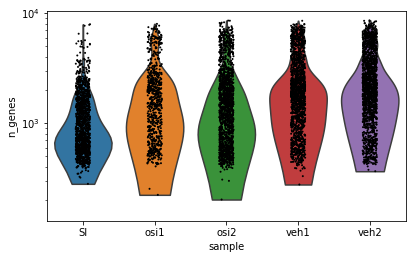

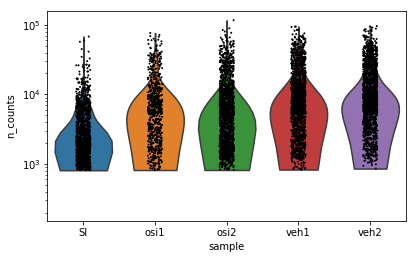

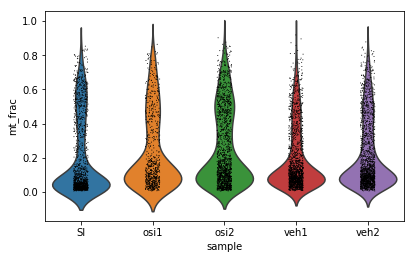

plotting mt_frac below.


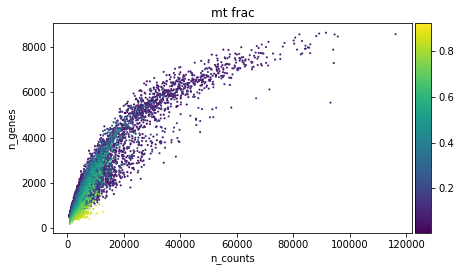

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


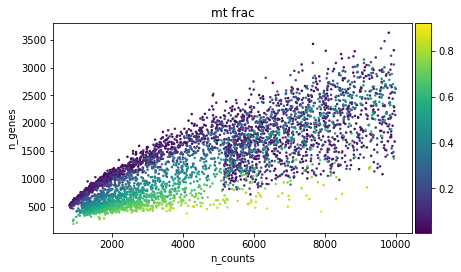

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


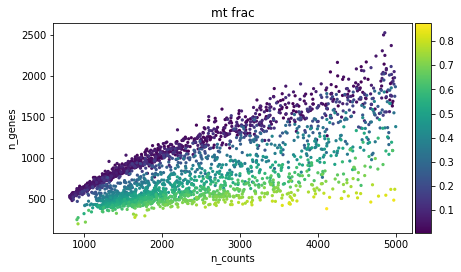

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


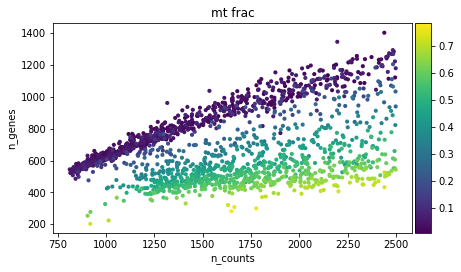

plotting sample below.


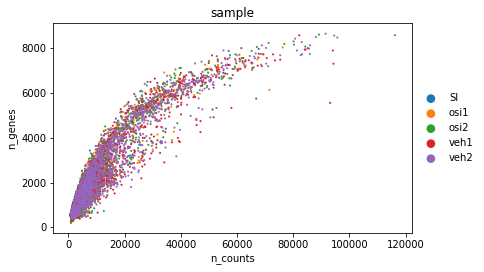

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


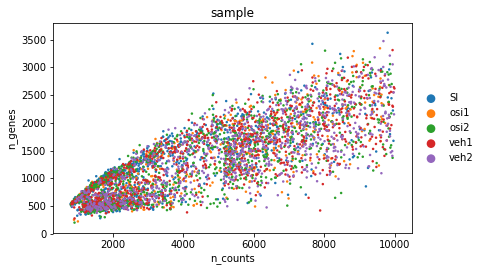

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


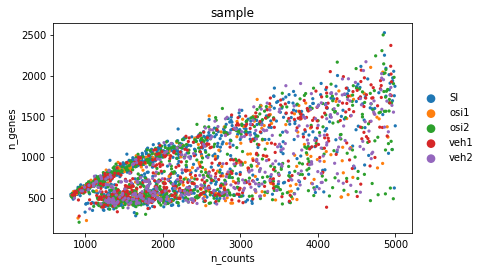

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


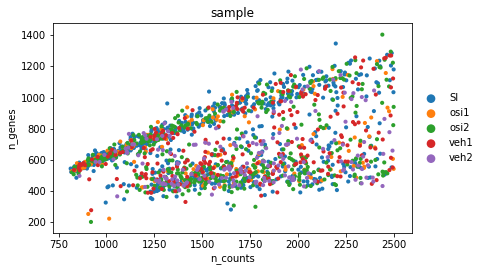

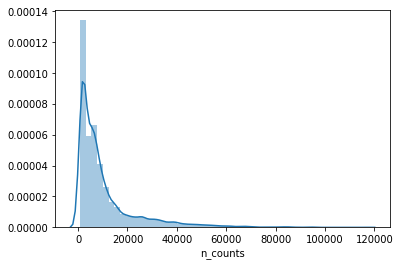

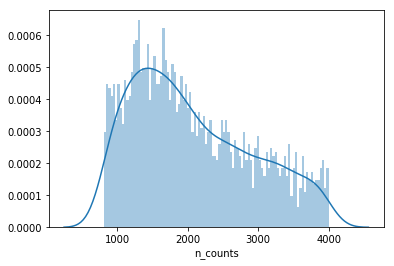

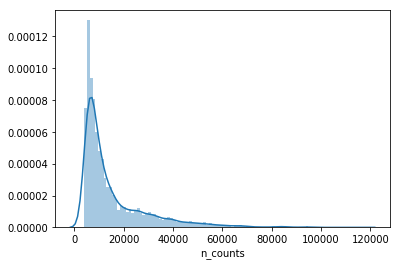

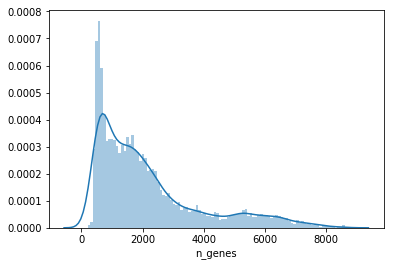

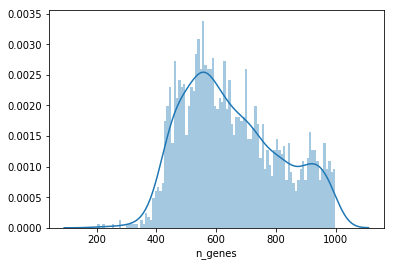

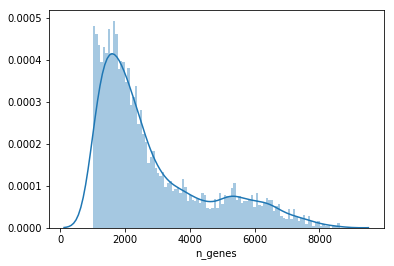

<Figure size 432x288 with 0 Axes>

In [5]:
###read in data by species
human = sceasy.read_species(human=True)
###overlay metadata
human = sceasy.overlay_meta(human,bcfile)
###qc
human = sceasy.qc_all(human)

Total number of cells: 6888
Number of cells after min count filter: 6888


Trying to set attribute `.obs` of view, making a copy.


Number of cells after max count filter: 6888
Number of cells after MT filter: 4831
Number of cells after gene filter: 4831
Total number of genes: 33538
Number of genes after cell filter: 15054
Total number of genes: 33538
Number of genes after cell filter: 14677

 Number of highly variable genes: 3000


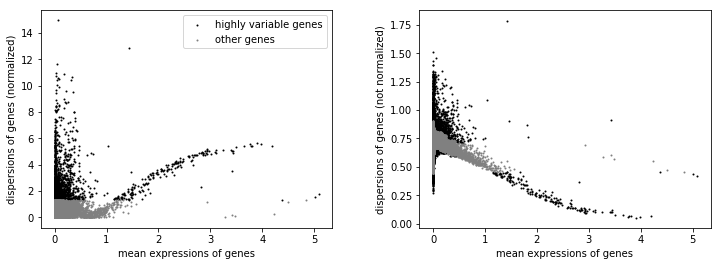


 Number of highly variable genes: 3000


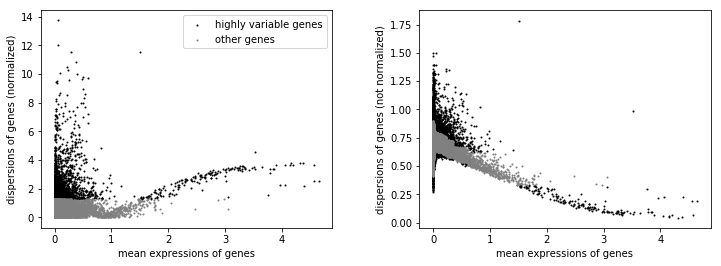

In [6]:
###filtering by cells by mt_thresh
##define
mt_thresh = 0.3
min_cells = 20
##filter
human,clean = sceasy.filters(human,mt_thresh,min_cells)